In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
df = pd.read_excel('../data/Ministry of Health Budget 2007 To 2023.xlsx')
df.sample(5)

,Hijri_year,Gregorian_year,Total_state_budget,Total_budget,Percentage,Workers_Compensation,Goods_and_Services,Expenditures_on_programs,Expenditures_on_projects,Unnamed: 9,Unnamed: 10
10,​1438/1439,2017.0,89000000.0,67757893.0,0.0761,27412949.0,8647051.0,27507479.0,4191314.0,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,​​1437/1438,2016.0,84000000.0,58899190.0,0.0701,26103790.0,8002551.0,22992849.0,1800000.0,NaN,NaN
16,​1445/1444,2023.0,111400000.0,80751614.0,0.0700,61303065.0,14933528.0,1228824.0,3286193.0,NaN,NaN
6,​1434/1435,2013.0,82000000.0,54350355.0,0.0700,25200000.0,7758600.0,16391755.0,5000000.0,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hijri_year                17 non-null     object 
 1   Gregorian_year            17 non-null     float64
 2   Total_state_budget        17 non-null     float64
 3   Total_budget              17 non-null     float64
 4   Percentage                17 non-null     float64
 5   Workers_Compensation      17 non-null     float64
 6   Goods_and_Services        17 non-null     float64
 7   Expenditures_on_programs  17 non-null     float64
 8   Expenditures_on_projects  17 non-null     float64
 9   Unnamed: 9                0 non-null      float64
 10  Unnamed: 10               1 non-null      float64
dtypes: float64(10), object(1)
memory usage: 2.0+ KB


In [19]:
expenditure_cols = [
    'Workers_Compensation', 
    'Goods_and_Services', 
    'Expenditures_on_programs', 
    'Expenditures_on_projects'
]

df['Calculated_Expenditures'] = df[expenditure_cols].sum(axis=1)

print("أول 5 صفوف مع إجمالي النفقات المحسوب:")
print(df[['Gregorian_year','Total_budget', 'Calculated_Expenditures']].head())

أول 5 صفوف مع إجمالي النفقات المحسوب:
   Gregorian_year  Total_budget  Calculated_Expenditures
0          2007.0    22808200.0               22808200.0
1          2008.0    25220000.0               25220000.0
2          2009.0    29518700.0               29518700.0
3          2010.0    35063200.0               35063200.0
4          2011.0    39860200.0               39860200.0


In [20]:
df['Variance'] = df['Total_budget'] - df['Calculated_Expenditures']

# عرض أي سنوات فيها اختلاف (Variance != 0)
inconsistent_years = df[df['Variance'] != 0]

if inconsistent_years.empty:
    print("\n✅ البيانات متسقة تماماً. إجمالي النفقات يساوي إجمالي الميزانية لكل السنوات.")
else:
    print("\n⚠️ تنبيه: تم العثور على اختلاف (Variance) في السنوات التالية:")
    print(inconsistent_years[['Gregorian_year', 'Total_budget', 'Calculated_Expenditures', 'Variance']])


⚠️ تنبيه: تم العثور على اختلاف (Variance) في السنوات التالية:
    Gregorian_year  Total_budget  Calculated_Expenditures   Variance
10          2017.0    67757893.0               67758793.0     -900.0
12          2019.0    75403859.0               68227572.0  7176287.0
15          2022.0    77696297.0               77696294.0        3.0
16          2023.0    80751614.0               80751610.0        4.0
17             NaN           NaN                      0.0        NaN
18             NaN           NaN                      0.0        NaN
19             NaN           NaN                      0.0        NaN
20             NaN           NaN                      0.0        NaN
21             NaN           NaN                      0.0        NaN


In [21]:
print("\n--- الإحصائيات الوصفية للميزانية والنفقات ---")
print(df[['Total_state_budget', 'Total_budget', 'Calculated_Expenditures']].describe())


--- الإحصائيات الوصفية للميزانية والنفقات ---
       Total_state_budget  Total_budget  Calculated_Expenditures
count        1.700000e+01  1.700000e+01             2.200000e+01
mean         7.966471e+07  5.625239e+07             4.314160e+07
std          2.347339e+07  1.969690e+07             2.929663e+07
min          3.800000e+07  2.280820e+07             0.000000e+00
25%          5.800000e+07  3.986020e+07             2.341115e+07
50%          8.550000e+07  5.998536e+07             5.071340e+07
75%          9.780000e+07  7.540386e+07             6.689341e+07
max          1.114000e+08  8.075161e+07             8.075161e+07


In [22]:
# حساب النسبة المئوية للتغير في عمود Total_budget
df['YoY_Change_Budget'] = df['Total_budget'].pct_change() * 100

print("\n--- التغير السنوي في الميزانية (%) ---")
print(df[['Gregorian_year', 'Total_budget', 'YoY_Change_Budget']])


--- التغير السنوي في الميزانية (%) ---
    Gregorian_year  Total_budget  YoY_Change_Budget
0           2007.0    22808200.0                NaN
1           2008.0    25220000.0          10.574267
2           2009.0    29518700.0          17.044806
3           2010.0    35063200.0          18.783009
4           2011.0    39860200.0          13.681010
5           2012.0    47076447.0          18.103891
6           2013.0    54350355.0          15.451268
7           2014.0    59985360.0          10.367927
8           2015.0    62342539.0           3.929590
9           2016.0    58899190.0          -5.523274
10          2017.0    67757893.0          15.040450
11          2018.0    64297264.0          -5.107344
12          2019.0    75403859.0          17.273822
13          2020.0    75413147.0           0.012318
14          2021.0    79846364.0           5.878573
15          2022.0    77696297.0          -2.692755
16          2023.0    80751614.0           3.932384
17             NaN      

C:\Users\DSC-GDP075\AppData\Local\Temp\ipykernel_24052\3523674757.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['YoY_Change_Budget'] = df['Total_budget'].pct_change() * 100


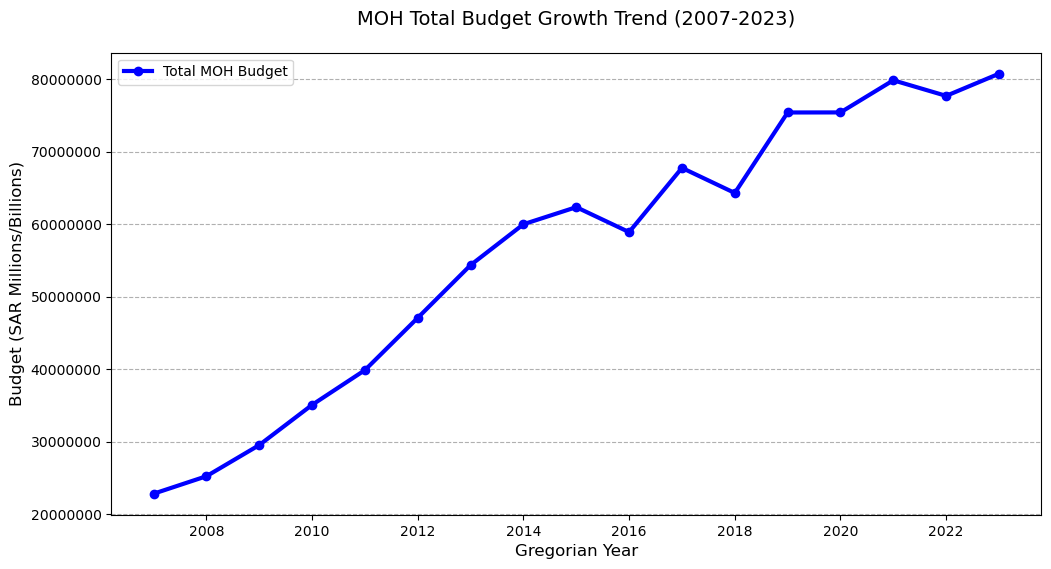

Time Series Line Chart successfully generated. This chart shows the overall budget growth.


In [23]:

# Securing the exact column names:
YEAR_COL = 'Gregorian_year' 
COMP_COL = "Workers_Compensation"
GOODS_COL = 'Goods_and_Services' 
PROG_COL = 'Expenditures_on_programs'

BUDGET_COL_CLEAN = "Total_budget"

# --- 1. Data Wrangling and Cleaning ---





# --- 2. Creating the Time Series Line Chart (Total Budget Trend) ---

# Setting the Gregorian year column as the index for the plot
df = df.set_index(YEAR_COL)

plt.figure(figsize=(12, 6))

# Plot the Total MOH Budget Trend (ONE LINE)
plt.plot(df.index, df[BUDGET_COL_CLEAN], label='Total MOH Budget', marker='o', color='blue', linewidth=3)


# --- 3. Final Formatting ---
plt.title('MOH Total Budget Growth Trend (2007-2023)', fontsize=14, pad=20)
plt.xlabel('Gregorian Year', fontsize=12)
plt.ylabel('Budget (SAR Millions/Billions)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

print("Time Series Line Chart successfully generated. This chart shows the overall budget growth.")